## Toss_Winners

In [6]:
##loading the csv files into dataframes
match_df = pd.read_csv(r'E:\D S\4A D S\ML by k\Dataset\matches.csv')
dlvr_df = pd.read_csv(r'E:\D S\4A D S\ML by k\Dataset\deliveries.csv')
match_df.sample(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
612,613,2016,Visakhapatnam,2016-05-08,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,85,0,A Nehra,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,S Ravi,C Shamshuddin,NaN
358,359,2012,Hyderabad,2012-05-08,Kings XI Punjab,Deccan Chargers,Deccan Chargers,field,normal,0,Kings XI Punjab,25,0,Mandeep Singh,"Rajiv Gandhi International Stadium, Uppal",HDPK Dharmasena,BNJ Oxenford,NaN
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,NaN
369,370,2012,Mumbai,2012-05-16,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Kolkata Knight Riders,32,0,SP Narine,Wankhede Stadium,S Das,BR Doctrove,NaN
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon
153,154,2009,Johannesburg,2009-05-10,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,7,A Mishra,New Wanderers Stadium,SL Shastri,RB Tiffin,NaN
230,231,2010,Mumbai,2010-04-21,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Mumbai Indians,35,0,KA Pollard,Dr DY Patil Sports Academy,BR Doctrove,RB Tiffin,NaN
416,417,2013,Mumbai,2013-04-27,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Mumbai Indians,58,0,DR Smith,Wankhede Stadium,Asad Rauf,S Asnani,NaN
265,266,2011,Delhi,2011-04-28,Kolkata Knight Riders,Delhi Daredevils,Delhi Daredevils,field,normal,0,Kolkata Knight Riders,17,0,MK Tiwary,Feroz Shah Kotla,PR Reiffel,RJ Tucker,NaN
460,461,2014,Abu Dhabi,2014-04-18,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN


In [7]:
match_df['winner'].value_counts()

Mumbai Indians                 98
Chennai Super Kings            90
Kolkata Knight Riders          86
Royal Challengers Bangalore    79
Kings XI Punjab                76
Rajasthan Royals               70
Delhi Daredevils               67
Sunrisers Hyderabad            52
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [8]:
match_df['team1'].value_counts()

Mumbai Indians                 91
Kings XI Punjab                84
Chennai Super Kings            83
Royal Challengers Bangalore    76
Kolkata Knight Riders          74
Delhi Daredevils               72
Rajasthan Royals               62
Sunrisers Hyderabad            55
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  14
Rising Pune Supergiant          8
Kochi Tuskers Kerala            7
Rising Pune Supergiants         7
Name: team1, dtype: int64

In [9]:
match_df[match_df['winner'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [10]:
##replacing null results with draw
match_df['winner'].fillna('Draw', inplace=True)

In [11]:
match_df[match_df['winner'].isnull() == True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [12]:
team_encodings = {
    'Mumbai Indians': 1,
    'Kolkata Knight Riders': 2,
    'Royal Challengers Bangalore': 3,
    'Deccan Chargers': 4,
    'Chennai Super Kings': 5,    
    'Rajasthan Royals': 6,
    'Delhi Daredevils': 7,
    'Gujarat Lions': 8,
    'Kings XI Punjab': 9,
    'Sunrisers Hyderabad': 10,
    'Rising Pune Supergiants': 11,
    'Rising Pune Supergiant': 11,
    'Kochi Tuskers Kerala':12,
    'Pune Warriors': 13,
    'Delhi Capitals': 14,
    'Draw': 15
}

team_encode_dict = {'team1': team_encodings,
                    'team2': team_encodings,
                    'toss_winner': team_encodings,
                    'winner': team_encodings
                   }

match_df.replace(team_encode_dict, inplace=True)
match_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,8,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,11,9,9,field,normal,0,9,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,3,7,3,bat,normal,0,3,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [13]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null object
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             696 non-null int64
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: int64(6), object(12)
memory usage: 98.0+ KB


In [14]:
match_df = match_df[['id', 'team1','team2','city','toss_decision','toss_winner','venue','winner']]
match_df.head()

,id,team1,team2,city,toss_decision,toss_winner,venue,winner
0,1,10,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",10
1,2,1,11,Pune,field,11,Maharashtra Cricket Association Stadium,11
2,3,8,2,Rajkot,field,2,Saurashtra Cricket Association Stadium,2
3,4,11,9,Indore,field,9,Holkar Cricket Stadium,9
4,5,3,7,Bangalore,bat,3,M Chinnaswamy Stadium,3


In [15]:
##looking at number of toss wins and match wins
toss_wins = match_df['winner'].value_counts(sort=True)
match_wins = match_df['winner'].value_counts(sort=True)

for idx, val in toss_wins.iteritems():
    print(f"{list(team_encode_dict['winner'].keys())[idx-1]} -> {toss_wins[idx]}")

Mumbai Indians -> 98
Chennai Super Kings -> 90
Kolkata Knight Riders -> 86
Royal Challengers Bangalore -> 79
Kings XI Punjab -> 76
Rajasthan Royals -> 70
Delhi Daredevils -> 67
Sunrisers Hyderabad -> 52
Deccan Chargers -> 29
Rising Pune Supergiants -> 15
Gujarat Lions -> 13
Kochi Tuskers Kerala -> 12
Rising Pune Supergiant -> 6
Delhi Capitals -> 3


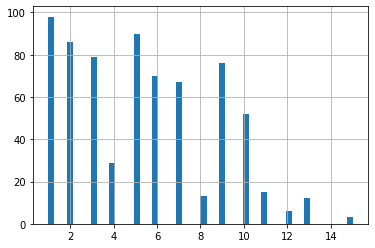

In [16]:
match_df['winner'].hist(bins=50)

In [17]:
match_df['winner'].value_counts()

1     98
5     90
2     86
3     79
9     76
6     70
7     67
10    52
4     29
11    15
8     13
13    12
12     6
15     3
Name: winner, dtype: int64

{'Mumbai Indians': 1,
 'Kolkata Knight Riders': 2,
 'Royal Challengers Bangalore': 3,
 'Deccan Chargers': 4,
 'Chennai Super Kings': 5,
 'Rajasthan Royals': 6,
 'Delhi Daredevils': 7,
 'Gujarat Lions': 8,
 'Kings XI Punjab': 9,
 'Sunrisers Hyderabad': 10,
 'Rising Pune Supergiants': 11,
 'Rising Pune Supergiant': 11,
 'Kochi Tuskers Kerala': 12,
 'Pune Warriors': 13,
 'Delhi Capitals': 14,
 'Draw': 15}

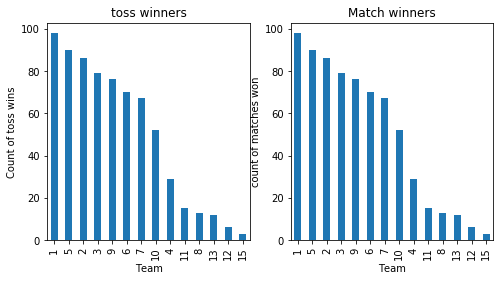

In [18]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Team')
ax1.set_ylabel('Count of toss wins')
ax1.set_title("toss winners")
toss_wins.plot(kind='bar')

ax2 = fig.add_subplot(122)
match_wins.plot(kind = 'bar')
ax2.set_xlabel('Team')
ax2.set_ylabel('count of matches won')
ax2.set_title("Match winners")

team_encodings

#### toss Winners Match winners
---

## Biggest victories in IPL

In [1]:
##importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import collections
from collections import defaultdict

In [2]:
#reading the data
matches=pd.read_csv(r'E:\D S\4A D S\ML by k\Dataset\matches.csv')

## There are mainly two possiblites of winning a match
1) While defending a score 2) While chasing a score

In [3]:
# While defending a score
defend_vict_ser = matches['win_by_runs'].value_counts()
defend_vict_ser.sort_values(ascending=True)

146      1
80       1
87       1
42       1
93       1
      ... 
7        9
10      10
4       11
14      11
0      381
Name: win_by_runs, Length: 88, dtype: int64

In [4]:
# Now finding that particular match
score = 146
for index, row in matches.iterrows():
    if(row['win_by_runs'] == score):
        print(row)

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object


In [5]:
# while chasing a score
wickets = 10
for index, row in matches.iterrows():
    if(row['win_by_wickets'] == wickets):
        print(row)

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

## The biggest win is by 10 wickets and happened 10 times in the history of IPL(till 2019)

### Observation
1) The biggest win by chasing a score is with 10 wickets.
2) The biggest win by defending a score is with 146 runs.